1. Read the data from the file “people.txt”.
1. Create a rule set E that contain rules to check for the following conditions :
   1. The age should be in the range 0-150.
   1. The age should be greater than years married.
   1. The status should be married or single or widowed.
   1. If age is less than 18 the age group should be child, if age is between 18 and 65 the age group should be adult, if age is more than 65 the age group should be elderly.
1. Check whether rule set E is violated by the data in the file people.txt.
1. Summarize the results obtained in part(iii)
1. Visualize the results obtained in part(iii)


In [1]:
import pandas as pd

data = pd.read_csv("people.txt", header=0, delimiter=r"\s+")

data

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [2]:
print(data.index)
data.info()

RangeIndex(start=0, stop=5, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           5 non-null      int64  
 1   agegroup      5 non-null      object 
 2   height        5 non-null      float64
 3   status        5 non-null      object 
 4   yearsmarried  5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 328.0+ bytes


In [3]:
ruleset_E = [
    lambda person: 0 <= person[0] <= 150,  # Age should be in the range 0-150
    lambda person: person[0] > person[4],  # Age should be greater than years married
    lambda person: person[3]
    in ["single", "married", "widowed"],  # Status should be married, single, or widowed
    lambda person: (person[0] < 18 and person[1] == "child")
    or (18 <= person[0] <= 65 and person[1] == "adult")
    or (person[0] > 65 and person[1] == "elderly"),  # Age group should match the age
]

In [4]:
violations = []
for person in data.values:
    for rule in ruleset_E:
        if not rule(person):
            violations.append((person, ruleset_E.index(rule)))
            break

In [5]:
print("Violations of Ruleset E:")
for person, rule in violations:
    print(f"Person: {person}")
    print(f"Violated rule: {rule + 1}")
    print()

if not violations:
    print("No violations found.")

Violations of Ruleset E:
Person: [18 'adult' 5.7 'married' 20]
Violated rule: 2

Person: [221 'elderly' 5.0 'widowed' 2]
Violated rule: 1

Person: [34 'child' -7.0 'married' 3]
Violated rule: 4



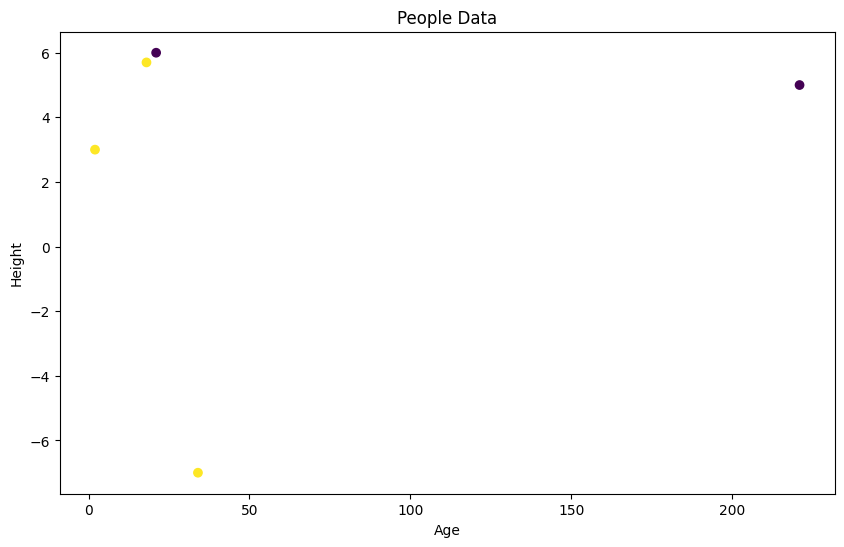

In [6]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

people = data.values
# Plot the data
ax.scatter(
    [person[0] for person in people],
    [person[2] for person in people],
    c=[person[3] == "married" for person in people],
)

# Add labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Height")
ax.set_title("People Data")

# Show the plot
plt.show()